In [1]:
import pandas as pd
from modules import Agent,Model
from DCAStrategy import DCAAgent
from LSStrategy import LSSAgent
import numpy as np
import torch
import pickle
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import seaborn as sns
import os
from preprocessing import Feature_Extractor, data_preprocessing


Start Trading

In [26]:
symbol = "ACB"

In [27]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')

In [28]:
df.tail

<bound method NDFrame.tail of             Date    Close     Open     High      Low
0     2014-01-20   4084.3   4109.2   4134.1   4059.4
1     2014-01-21   4009.6   4059.4   4084.3   4009.6
2     2014-01-22   4009.6   4009.6   4034.5   4009.6
3     2014-01-23   4009.6   4034.5   4059.4   4009.6
4     2014-01-24   4034.5   4009.6   4059.4   4009.6
...          ...      ...      ...      ...      ...
2586  2024-06-12  24550.0  24150.0  24550.0  23900.0
2587  2024-06-13  24800.0  24550.0  24900.0  24400.0
2588  2024-06-14  24600.0  24700.0  24900.0  24600.0
2589  2024-06-17  24550.0  24600.0  24600.0  24250.0
2590  2024-06-18  24550.0  24700.0  24700.0  24400.0

[2591 rows x 5 columns]>

Trade without LSTM

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
minmax = pickle.load(open(f"checkpoint/{symbol}_scaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}_model.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
initial_money = np.max(parameters[0]) * 3
# initial_money= 600000
skip = 1
from_date ="2023-05-18"
to_date = "2024-06-18"
from_date = pd.to_datetime(from_date)
to_date = pd.to_datetime(to_date)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()

In [37]:
agent = Agent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [38]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent.trade(value, date = date)
    trade_results.append(result)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0.00000000e+000 1.00000000e+000 1.37101718e-313]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1.00000000e+000 0.00000000e+000 1.01179069e-164]
[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0.00000000e+000 1.00000000e+000 1.47442468e-238]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.

In [39]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])

In [33]:
result

,status,action,close,balance,timestamp,date,total,investment,total_investment,all_bought,all_sold,gain
0,data not enough to trade,0,20883.0,1000000.0,2024-06-19 11:32:05.825563,2023-05-18,NaN,NaN,NaN,NaN,NaN,NaN
1,data not enough to trade,0,20841.0,1000000.0,2024-06-19 11:32:05.825563,2023-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2,data not enough to trade,0,20925.0,1000000.0,2024-06-19 11:32:05.825563,2023-05-22,NaN,NaN,NaN,NaN,NaN,NaN
3,data not enough to trade,0,21176.0,1000000.0,2024-06-19 11:32:05.825563,2023-05-23,NaN,NaN,NaN,NaN,NaN,NaN
4,data not enough to trade,0,21009.0,1000000.0,2024-06-19 11:32:05.829763,2023-05-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
267,"sell 1 unit, price 24550.000000",2,24550.0,952284.8,2024-06-19 11:32:06.004840,2024-06-12,1001384.8,-1.008065,0.047583,1649315.2,1650100.0,-250.0
268,do nothing,0,24800.0,952284.8,2024-06-19 11:32:06.004840,2024-06-13,1001884.8,NaN,NaN,NaN,NaN,NaN
269,do nothing,0,24600.0,952284.8,2024-06-19 11:32:06.013031,2024-06-14,1001484.8,NaN,NaN,NaN,NaN,NaN
270,"buy 1 unit, cost 24550.000000",1,24550.0,927734.8,2024-06-19 11:32:06.013031,2024-06-17,1001384.8,NaN,NaN,NaN,NaN,NaN


In [40]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

1.1730292505207398
3.7391333333333407
22084.80000000003
3.680800000000005


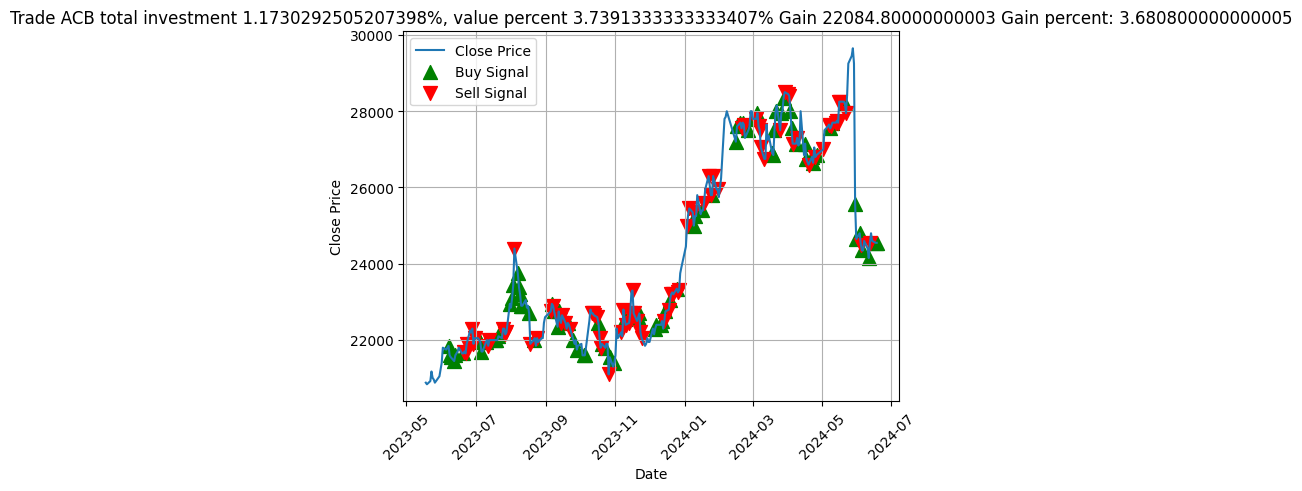

In [41]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

With LSTM

In [41]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
# initial_money = np.max(parameters[0]) * 3
initial_money = 500000
minmax = pickle.load(open(f"checkpoint/{symbol}prediction_scaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}prediction_model.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [61]:
agent2 = Agent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [62]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent2.trade(value, date = date)
    trade_results.append(result)

[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0.00000000e+000 1.00000000e+000 2.30880285e-259]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]


In [63]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])
# total_gain = result['gain'].sum()
# total_investment = result['investment'].sum()

In [64]:
result

,status,action,close,balance,timestamp,date,total,investment,total_investment,all_bought,all_sold,gain
0,data not enough to trade,0,28100.0,500000.0,2024-06-18 20:43:32.608878,2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN
1,data not enough to trade,0,28300.0,500000.0,2024-06-18 20:43:32.608878,2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2,data not enough to trade,0,27950.0,500000.0,2024-06-18 20:43:32.610347,2024-05-08,NaN,NaN,NaN,NaN,NaN,NaN
3,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:32.610347,2024-05-09,NaN,NaN,NaN,NaN,NaN,NaN
4,data not enough to trade,0,27600.0,500000.0,2024-06-18 20:43:32.610347,2024-05-10,NaN,NaN,NaN,NaN,NaN,NaN
5,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:32.610347,2024-05-13,NaN,NaN,NaN,NaN,NaN,NaN
6,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:32.610347,2024-05-14,NaN,NaN,NaN,NaN,NaN,NaN
7,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:32.610347,2024-05-15,NaN,NaN,NaN,NaN,NaN,NaN
8,data not enough to trade,0,28400.0,500000.0,2024-06-18 20:43:32.611621,2024-05-16,NaN,NaN,NaN,NaN,NaN,NaN
9,"buy 1 unit, cost 28500.000000",1,28500.0,471500.0,2024-06-18 20:43:32.612128,2024-05-17,500000.0,NaN,NaN,NaN,NaN,NaN


In [65]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

1.7851012701682114
0.52
2600.0
0.52


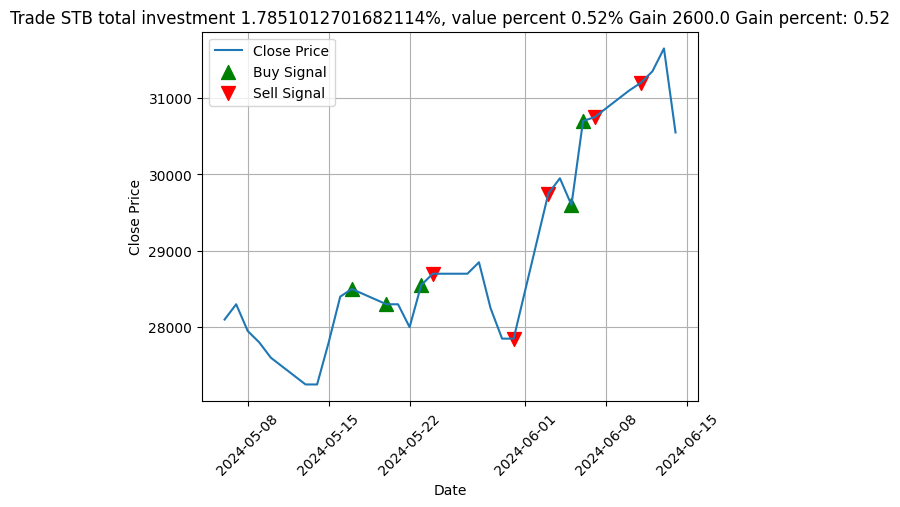

In [66]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

DCA without LSTM

In [67]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
# initial_money = np.max(parameters[0]) * 5
initial_money =  500000
minmax = pickle.load(open(f"checkpoint/{symbol}_DCAscaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}_DCAmodel.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [68]:
agent3 = DCAAgent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [69]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent3.trade(value, date = date)
    trade_results.append(result)

[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[4.88901261e-87 0.00000000e+00 1.00000000e+00]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]


In [70]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])
# total_gain = result['gain'].sum()
# total_investment = result['investment'].sum()

In [71]:
result

,status,action,close,balance,timestamp,date,total,investment,average_investment,all_bought,all_sold,total_investment,gain,total_sold
0,data not enough to trade,0,28100.0,500000.0,2024-06-18 20:43:33.157749,2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data not enough to trade,0,28300.0,500000.0,2024-06-18 20:43:33.157749,2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data not enough to trade,0,27950.0,500000.0,2024-06-18 20:43:33.157749,2024-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:33.157749,2024-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data not enough to trade,0,27600.0,500000.0,2024-06-18 20:43:33.157749,2024-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:33.157749,2024-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:33.159104,2024-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:33.159104,2024-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,data not enough to trade,0,28400.0,500000.0,2024-06-18 20:43:33.159104,2024-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,do nothing,0,28500.0,500000.0,2024-06-18 20:43:33.160528,2024-05-17,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

4.500191497510532
2.35
11750.0
2.35


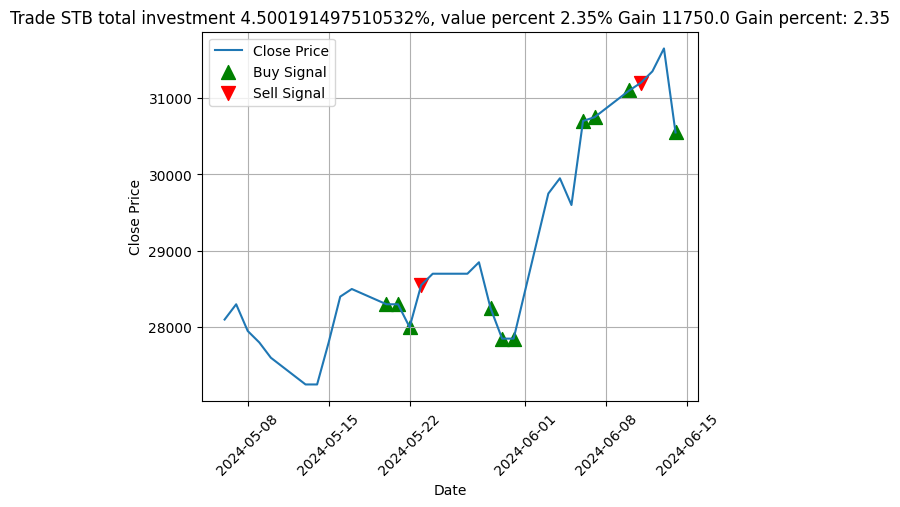

In [73]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

DCA with LSTM

In [74]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
initial_money = 500000
minmax = pickle.load(open(f"checkpoint/{symbol}Prediction_DCAscaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}Prediction_DCAmodel.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [75]:
agent4 = DCAAgent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [76]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent4.trade(value, date = date)
    trade_results.append(result)

[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]


In [77]:
trade_results

[{'status': 'data not enough to trade',
  'action': 0,
  'close': 28100.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-06'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 28300.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-07'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27950.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-08'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27800.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-09'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27600.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-10'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27250.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:43:33.638954',
  'date': '2024-05-13'},
 {'s

In [78]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])
# total_gain = result['gain'].sum()
# total_investment = result['investment'].sum()

In [79]:
result

,status,action,close,balance,timestamp,date,total
0,data not enough to trade,0,28100.0,500000.0,2024-06-18 20:43:33.638954,2024-05-06,NaN
1,data not enough to trade,0,28300.0,500000.0,2024-06-18 20:43:33.638954,2024-05-07,NaN
2,data not enough to trade,0,27950.0,500000.0,2024-06-18 20:43:33.638954,2024-05-08,NaN
3,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:33.638954,2024-05-09,NaN
4,data not enough to trade,0,27600.0,500000.0,2024-06-18 20:43:33.638954,2024-05-10,NaN
5,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:33.638954,2024-05-13,NaN
6,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:43:33.638954,2024-05-14,NaN
7,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:43:33.638954,2024-05-15,NaN
8,data not enough to trade,0,28400.0,500000.0,2024-06-18 20:43:33.638954,2024-05-16,NaN
9,"buy 1 unit, cost 28500.000000",1,28500.0,471500.0,2024-06-18 20:43:33.642443,2024-05-17,500000.0


In [80]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

IndexError: single positional indexer is out-of-bounds

4.500191497510532
2.35
11750.0
2.35


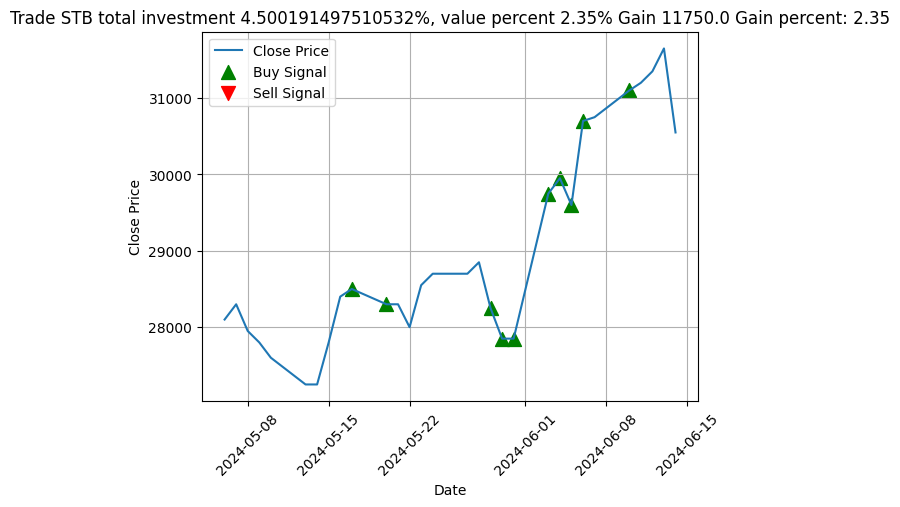

In [81]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

LSS WITHOUT LSTM


In [91]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
initial_money = 500000
minmax = pickle.load(open(f"checkpoint/{symbol}_LSSscaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}_LSSmodel.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()


c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [92]:
df.tail

<bound method NDFrame.tail of            Date    Close  pct_change  log_change           7ma          14ma  \
21   2014-02-26  17154.0    0.018283    0.018118  16372.314027  16157.433811   
22   2014-02-27  16692.0   -0.026932   -0.027302  16452.342587  16231.463560   
23   2014-02-28  16385.0   -0.018392   -0.018563  16435.490030  16252.617164   
24   2014-03-03  15538.0   -0.051694   -0.053078  16210.948546  16154.595676   
25   2014-03-04  15385.0   -0.009847   -0.009896  16004.344800  16049.436069   
...         ...      ...         ...         ...           ...           ...   
2588 2024-06-10  31100.0    0.011382    0.011318  30131.618773  29491.376160   
2589 2024-06-11  31200.0    0.003215    0.003210  30398.714080  29719.192672   
2590 2024-06-12  31350.0    0.004808    0.004796  30636.535560  29936.633649   
2591 2024-06-13  31650.0    0.009569    0.009524  30889.901670  30165.082496   
2592 2024-06-14  30550.0   -0.034755   -0.035373  30804.926252  30216.404830   

         

In [93]:
agent5 = LSSAgent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [94]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent5.trade(value, date = date)
    trade_results.append(result)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]


In [95]:
trade_results

[{'status': 'data not enough to trade',
  'action': 0,
  'close': 28100.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.286408',
  'date': '2024-05-06'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 28300.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.286408',
  'date': '2024-05-07'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27950.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.287435',
  'date': '2024-05-08'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27800.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.287435',
  'date': '2024-05-09'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27600.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.287435',
  'date': '2024-05-10'},
 {'status': 'data not enough to trade',
  'action': 0,
  'close': 27250.0,
  'balance': 500000,
  'timestamp': '2024-06-18 20:45:36.288445',
  'date': '2024-05-13'},
 {'s

In [96]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])
# total_gain = result['gain'].sum()
# total_investment = result['investment'].sum()

In [97]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

5.363175675675675
2.54
12700.0
2.54


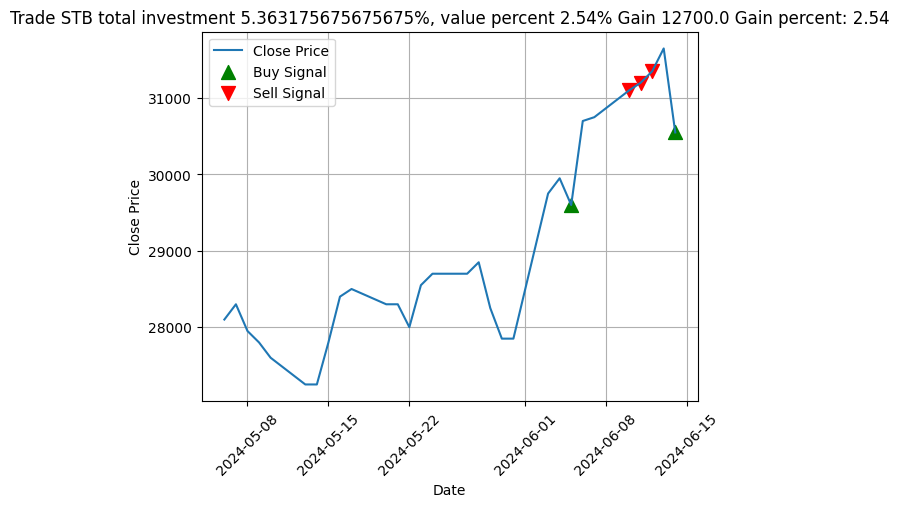

In [99]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

LSS WITH LSTM

In [100]:
df = pd.read_csv(f'DataTraining/{symbol}.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_init = df[['Close']]  
df_init = data_preprocessing(df_init, Feature_Extractor)
real_trend = df_init['Close'].tolist()
parameters = [df_init[cl].tolist() for cl in df_init.columns]
initial_money = 500000
minmax = pickle.load(open(f"checkpoint/{symbol}Prediction_LSSscaler.pkl", 'rb'))
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
with open(f"checkpoint/{symbol}Prediction_LSSmodel.pkl", 'rb') as fopen:
    model = pickle.load(fopen)
df = df[['Date', 'Close']]
#Preprocess Dataframe
df = data_preprocessing(df, Feature_Extractor)
selected_data = df.loc[(df['Date'] >= from_date) & (df['Date'] <= to_date),:]
data_list = selected_data.values.tolist()

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [101]:
agent6 = LSSAgent(model = model,
                timeseries = scaled_parameters,
                skip = skip,
                initial_money = initial_money,
                real_trend = real_trend,
                minmax = minmax,
                window_size = 10)

In [102]:
trade_results = []
for row in data_list:
    #ensure first column is Date
    date = row[0]
    value = row[1:]
    result = agent6.trade(value, date = date)
    trade_results.append(result)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


In [103]:
result = pd.DataFrame(trade_results)

# Convert the 'date' column to datetime format
result['date'] = pd.to_datetime(result['date'])
# total_gain = result['gain'].sum()
# total_investment = result['investment'].sum()

In [104]:
result

,status,action,close,balance,timestamp,date,total,investment,total_investment,gain
0,data not enough to trade,0,28100.0,500000.0,2024-06-18 20:46:05.795261,2024-05-06,NaN,NaN,NaN,NaN
1,data not enough to trade,0,28300.0,500000.0,2024-06-18 20:46:05.795261,2024-05-07,NaN,NaN,NaN,NaN
2,data not enough to trade,0,27950.0,500000.0,2024-06-18 20:46:05.795261,2024-05-08,NaN,NaN,NaN,NaN
3,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:46:05.795261,2024-05-09,NaN,NaN,NaN,NaN
4,data not enough to trade,0,27600.0,500000.0,2024-06-18 20:46:05.795261,2024-05-10,NaN,NaN,NaN,NaN
5,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:46:05.796405,2024-05-13,NaN,NaN,NaN,NaN
6,data not enough to trade,0,27250.0,500000.0,2024-06-18 20:46:05.796405,2024-05-14,NaN,NaN,NaN,NaN
7,data not enough to trade,0,27800.0,500000.0,2024-06-18 20:46:05.796405,2024-05-15,NaN,NaN,NaN,NaN
8,data not enough to trade,0,28400.0,500000.0,2024-06-18 20:46:05.796405,2024-05-16,NaN,NaN,NaN,NaN
9,do nothing,0,28500.0,500000.0,2024-06-18 20:46:05.797809,2024-05-17,500000.0,NaN,NaN,NaN


In [105]:
df_action_2 = result[result['action'] == 2]

# Sắp xếp DataFrame theo timestamp hoặc date để đảm bảo lấy hàng cuối cùng
df_action_2_sorted = df_action_2.sort_values(by='date')

# Lấy giá trị total_investment của hàng cuối cùng
last_total_investment = df_action_2_sorted.iloc[-1]['total_investment']
df_sorted = result.sort_values(by='date')

# Lấy giá trị total của hàng cuối cùng
last_total = df_sorted.iloc[-1]['total']
investmentvalue = (last_total-initial_money)/initial_money *100
total_gain = result['gain'].sum()
investGain = total_gain/initial_money *100

7.867310625317743
7.140000000000001
30950.0
6.1899999999999995


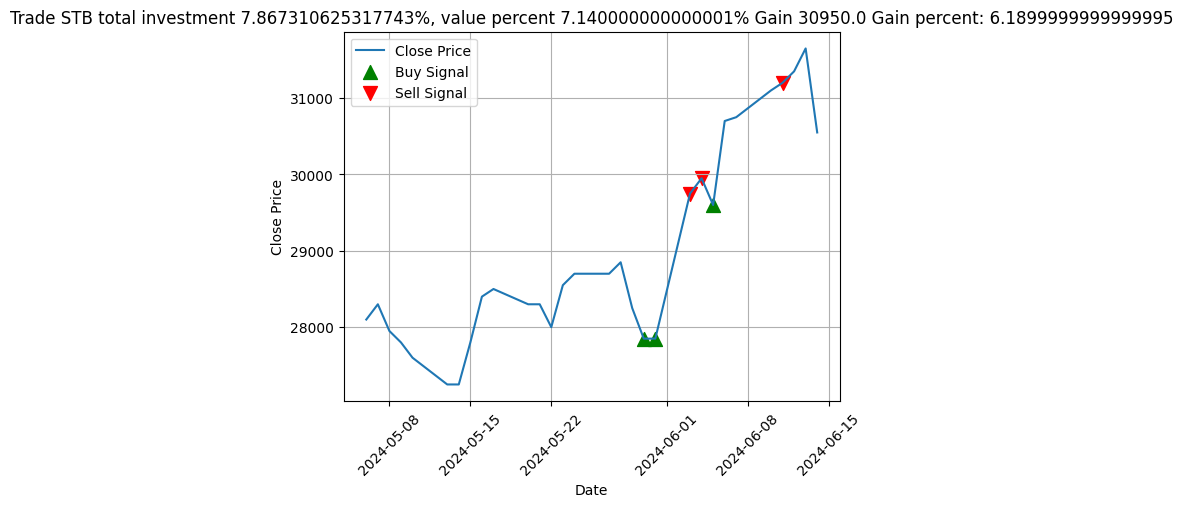

In [106]:
print(last_total_investment)
print(investmentvalue)
print(total_gain)
print(investGain)

# Mark buy and sell actions
buy_signals = result[result['action'] == 1]
sell_signals = result[result['action'] == 2]
plt.plot(result['date'], result['close'], linestyle='-', label='Close Price')

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', s=100, label='Sell Signal')

# Customize the plot
plt.title(f'Trade {symbol} total investment {last_total_investment}%, value percent {investmentvalue}% Gain {total_gain} Gain percent: {investGain}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()